In [1]:
import json
import spotipy as sp
import pandas as pd

In [78]:
# Use Hydra later
config = json.load(open(file="config.json", encoding="utf-8"))
config

{'CLIENT_ID': '468b8b024bfb41d5b1957dad2afc766a',
 'CLIENT_SECRET': '8827668f8ed64f13bf8c2e83781c3997',
 'REDIRECT_URI': 'http://localhost:8080'}

In [3]:
scope = "user-read-recently-played"

In [4]:
auth = sp.SpotifyOAuth(client_id=config["CLIENT_ID"],
    client_secret=config["CLIENT_SECRET"],
    redirect_uri=config["REDIRECT_URI"])

In [5]:
sp = sp.Spotify(auth_manager=auth)

In [6]:
results = sp.current_user_recently_played()

In [7]:
play_count = {}
for item in results['items']:
    track = item['track']
    artist = track['artists'][0]['name']
    if artist in play_count:
        play_count[artist]+=1
    else:
        play_count[artist]=1

In [8]:
df = pd.DataFrame.from_dict(play_count, orient='index')
df.columns = ['Play Count']
df.sort_values(by='Play Count', inplace=True, ascending=False)
df.head()

,Play Count
Dominic Fike,5
Briston Maroney,4
Goth Babe,3
Still Woozy,3
Khalid,2


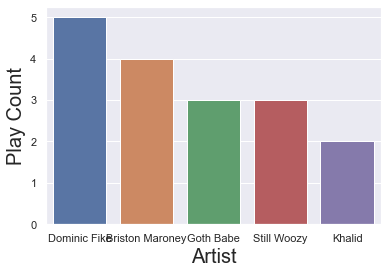

<Figure size 2160x2160 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

top_5 = df.head()

sns.set()
sns.barplot(x=top_5.index, y=top_5['Play Count'])

plt.xlabel("Artist", fontsize=20)
plt.ylabel("Play Count", fontsize=20)
plt.figure(figsize=(30,30))

plt.show()

In [10]:
tracks = []
unique = []
for item in results['items']:
    track = item['track']
    if track['name'] in unique:
        continue
    info = [track['name'], track['album']['name'], track['artists'][0]['name']]
    tracks.append(info)
    unique.append(track['name'])
print(tracks[0])

['Reptilia', 'Room On Fire', 'The Strokes']


In [11]:
tracks_df = pd.DataFrame(tracks, columns=['Name', 'Album', 'Artist'])
tracks_df.head()

,Name,Album,Artist
0,Reptilia,Room On Fire,The Strokes
1,hot tub DREAM Machine,hot tub DREAM Machine,tobi lou
2,Australia,Wincing The Night Away,The Shins
3,Hundred,Free Spirit,Khalid
4,Under My Skin,Carnival,Briston Maroney


In [12]:
tracks_df[tracks_df['Artist'].str[0]=='E']

,Name,Album,Artist
40,ALL EYES ON ME,GHETTO GODS,EARTHGANG


In [13]:
results.keys()

dict_keys(['items', 'next', 'cursors', 'limit', 'href'])

In [14]:
print(results['items'][0].keys())
print(len(results['items']))

dict_keys(['track', 'played_at', 'context'])
50


In [15]:
item_dict = results['items'][0]

In [16]:
item_dict['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [43]:
item_dict['track']['id']

'57Xjny5yNzAcsxnusKmAfA'

In [34]:
item_dict['track']['artists'][0]['name']

'The Strokes'

In [17]:
item_dict['track']['name']

'Reptilia'

In [24]:
item_dict['track']['album']['release_date']

{'album_type': 'album',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0epOFNiUfyON9EYx7Tpr6V'},
   'href': 'https://api.spotify.com/v1/artists/0epOFNiUfyON9EYx7Tpr6V',
   'id': '0epOFNiUfyON9EYx7Tpr6V',
   'name': 'The Strokes',
   'type': 'artist',
   'uri': 'spotify:artist:0epOFNiUfyON9EYx7Tpr6V'}],
 'available_markets': ['AD',
  'AE',
  'AG',
  'AL',
  'AM',
  'AO',
  'AR',
  'AT',
  'AU',
  'AZ',
  'BA',
  'BB',
  'BD',
  'BE',
  'BF',
  'BG',
  'BH',
  'BI',
  'BJ',
  'BN',
  'BO',
  'BR',
  'BS',
  'BT',
  'BW',
  'BY',
  'BZ',
  'CA',
  'CD',
  'CG',
  'CH',
  'CI',
  'CL',
  'CM',
  'CO',
  'CR',
  'CV',
  'CW',
  'CY',
  'CZ',
  'DE',
  'DJ',
  'DK',
  'DM',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'FI',
  'FJ',
  'FM',
  'FR',
  'GA',
  'GB',
  'GD',
  'GE',
  'GH',
  'GM',
  'GN',
  'GQ',
  'GR',
  'GT',
  'GW',
  'GY',
  'HK',
  'HN',
  'HR',
  'HT',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IQ',
  'IS',
  'IT',
  'JM',
  'JO',
  'JP'

In [19]:
item_dict['track']['explicit']

False

In [20]:
item_dict['track']['duration_ms']

219826

In [21]:
item_dict['track']['popularity']

77

In [23]:
item_dict['track']['is_local']

False

In [44]:
def get_info(item):
    track = item['track']
    track_id = track['id']
    song_name = track['name']
    album_name = track['album']['name']
    artist_name = track['artists'][0]['name']
    explicit = track['explicit']
    duration = track['duration_ms']
    song_popularity = track['popularity']
    album_release_date = track['album']['release_date']
    return [track_id, song_name, album_name, artist_name, explicit,
        duration, song_popularity, album_release_date]

In [45]:
all_tracks = []
for item in results['items']:
    all_tracks.append(get_info(item))

In [46]:
headers = ['Track ID', 'Song Name', 'Album Name', 'Artist Name', 'Explicit', 'Duration',
    'Song Popularity', 'Album Release Date']
tracks_df = pd.DataFrame(all_tracks, columns=headers)
tracks_df.head()

,Track ID,Song Name,Album Name,Artist Name,Explicit,Duration,Song Popularity,Album Release Date
0,57Xjny5yNzAcsxnusKmAfA,Reptilia,Room On Fire,The Strokes,False,219826,77,2003-10-28
1,1SWg0LGSxwbD3pyLfW0z5H,hot tub DREAM Machine,hot tub DREAM Machine,tobi lou,True,205714,61,2020-02-21
2,47TQjzeG4KI0XWWb0wkbri,Australia,Wincing The Night Away,The Shins,False,236711,65,2007-01-23
3,0HEckRWFSknIupbGzavk5d,Hundred,Free Spirit,Khalid,False,277080,63,2019-04-05
4,6Jqk2PWC70GEBNmXwmTGHp,Under My Skin,Carnival,Briston Maroney,False,253777,59,2018-11-16


In [53]:
tracks_df['Analysis'] = sp.audio_features(tracks_df['Track ID'].to_list())
tracks_df.head()

,Track ID,Song Name,Album Name,Artist Name,Explicit,Duration,Song Popularity,Album Release Date,Analysis
0,57Xjny5yNzAcsxnusKmAfA,Reptilia,Room On Fire,The Strokes,False,219826,77,2003-10-28,"{'danceability': 0.489, 'energy': 0.649, 'key'..."
1,1SWg0LGSxwbD3pyLfW0z5H,hot tub DREAM Machine,hot tub DREAM Machine,tobi lou,True,205714,61,2020-02-21,"{'danceability': 0.677, 'energy': 0.526, 'key'..."
2,47TQjzeG4KI0XWWb0wkbri,Australia,Wincing The Night Away,The Shins,False,236711,65,2007-01-23,"{'danceability': 0.416, 'energy': 0.827, 'key'..."
3,0HEckRWFSknIupbGzavk5d,Hundred,Free Spirit,Khalid,False,277080,63,2019-04-05,"{'danceability': 0.772, 'energy': 0.483, 'key'..."
4,6Jqk2PWC70GEBNmXwmTGHp,Under My Skin,Carnival,Briston Maroney,False,253777,59,2018-11-16,"{'danceability': 0.513, 'energy': 0.676, 'key'..."


In [55]:
jsoned_tracks = pd.json_normalize(tracks_df['Analysis'])
jsoned_tracks.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.489,0.649,9,-5.110,1,0.0336,0.000603,0.713000,0.101,0.770,158.009,audio_features,57Xjny5yNzAcsxnusKmAfA,spotify:track:57Xjny5yNzAcsxnusKmAfA,https://api.spotify.com/v1/tracks/57Xjny5yNzAc...,https://api.spotify.com/v1/audio-analysis/57Xj...,219827,4
1,0.677,0.526,11,-8.245,1,0.0361,0.264000,0.000003,0.113,0.467,140.082,audio_features,1SWg0LGSxwbD3pyLfW0z5H,spotify:track:1SWg0LGSxwbD3pyLfW0z5H,https://api.spotify.com/v1/tracks/1SWg0LGSxwbD...,https://api.spotify.com/v1/audio-analysis/1SWg...,205714,4
2,0.416,0.827,4,-5.177,1,0.0384,0.004280,0.000242,0.277,0.870,169.902,audio_features,47TQjzeG4KI0XWWb0wkbri,spotify:track:47TQjzeG4KI0XWWb0wkbri,https://api.spotify.com/v1/tracks/47TQjzeG4KI0...,https://api.spotify.com/v1/audio-analysis/47TQ...,236712,4
3,0.772,0.483,6,-10.060,0,0.0564,0.052100,0.000375,0.377,0.479,120.005,audio_features,0HEckRWFSknIupbGzavk5d,spotify:track:0HEckRWFSknIupbGzavk5d,https://api.spotify.com/v1/tracks/0HEckRWFSknI...,https://api.spotify.com/v1/audio-analysis/0HEc...,277080,4
4,0.513,0.676,2,-5.337,1,0.0307,0.224000,0.001110,0.217,0.221,78.489,audio_features,6Jqk2PWC70GEBNmXwmTGHp,spotify:track:6Jqk2PWC70GEBNmXwmTGHp,https://api.spotify.com/v1/tracks/6Jqk2PWC70GE...,https://api.spotify.com/v1/audio-analysis/6Jqk...,253777,4


In [60]:
jsoned_tracks.sort_values(by=['danceability'], ascending=False, inplace=True)
jsoned_tracks.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
40,0.966,0.435,1,-4.944,1,0.0674,0.0604,0.22000,0.0511,0.561,111.160,audio_features,4MAADpR6MjelkaZqe3Mgnv,spotify:track:4MAADpR6MjelkaZqe3Mgnv,https://api.spotify.com/v1/tracks/4MAADpR6Mjel...,https://api.spotify.com/v1/audio-analysis/4MAA...,126386,4
34,0.935,0.560,0,-8.249,0,0.2080,0.3750,0.05660,0.0819,0.660,95.028,audio_features,47iwiNOjkzDG4I0dLRcHYr,spotify:track:47iwiNOjkzDG4I0dLRcHYr,https://api.spotify.com/v1/tracks/47iwiNOjkzDG...,https://api.spotify.com/v1/audio-analysis/47iw...,142335,4
43,0.914,0.520,2,-8.247,0,0.3300,0.4830,0.00000,0.0937,0.485,90.003,audio_features,6NxpWAcnqCE6J9pVyLZLeQ,spotify:track:6NxpWAcnqCE6J9pVyLZLeQ,https://api.spotify.com/v1/tracks/6NxpWAcnqCE6...,https://api.spotify.com/v1/audio-analysis/6Nxp...,240289,4
39,0.900,0.538,7,-7.879,1,0.0343,0.2290,0.84300,0.2870,0.713,95.508,audio_features,4j4pPKE3xAblPIbhxScC1j,spotify:track:4j4pPKE3xAblPIbhxScC1j,https://api.spotify.com/v1/tracks/4j4pPKE3xAbl...,https://api.spotify.com/v1/audio-analysis/4j4p...,173693,4
31,0.875,0.649,6,-5.754,1,0.0433,0.4290,0.00237,0.0704,0.833,140.031,audio_features,0brBOx8ejPXvBYnQkWquYK,spotify:track:0brBOx8ejPXvBYnQkWquYK,https://api.spotify.com/v1/tracks/0brBOx8ejPXv...,https://api.spotify.com/v1/audio-analysis/0brB...,194693,4


In [76]:
merged_df = pd.merge(tracks_df, jsoned_tracks, how='inner', left_on='Track ID', right_on='id')
merged_df.drop(['Analysis'], inplace=True, axis=1)
merged_df.head()

,Track ID,Song Name,Album Name,Artist Name,Explicit,Duration,Song Popularity,Album Release Date,danceability,energy,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,57Xjny5yNzAcsxnusKmAfA,Reptilia,Room On Fire,The Strokes,False,219826,77,2003-10-28,0.489,0.649,...,0.101,0.770,158.009,audio_features,57Xjny5yNzAcsxnusKmAfA,spotify:track:57Xjny5yNzAcsxnusKmAfA,https://api.spotify.com/v1/tracks/57Xjny5yNzAc...,https://api.spotify.com/v1/audio-analysis/57Xj...,219827,4
1,1SWg0LGSxwbD3pyLfW0z5H,hot tub DREAM Machine,hot tub DREAM Machine,tobi lou,True,205714,61,2020-02-21,0.677,0.526,...,0.113,0.467,140.082,audio_features,1SWg0LGSxwbD3pyLfW0z5H,spotify:track:1SWg0LGSxwbD3pyLfW0z5H,https://api.spotify.com/v1/tracks/1SWg0LGSxwbD...,https://api.spotify.com/v1/audio-analysis/1SWg...,205714,4
2,47TQjzeG4KI0XWWb0wkbri,Australia,Wincing The Night Away,The Shins,False,236711,65,2007-01-23,0.416,0.827,...,0.277,0.870,169.902,audio_features,47TQjzeG4KI0XWWb0wkbri,spotify:track:47TQjzeG4KI0XWWb0wkbri,https://api.spotify.com/v1/tracks/47TQjzeG4KI0...,https://api.spotify.com/v1/audio-analysis/47TQ...,236712,4
3,0HEckRWFSknIupbGzavk5d,Hundred,Free Spirit,Khalid,False,277080,63,2019-04-05,0.772,0.483,...,0.377,0.479,120.005,audio_features,0HEckRWFSknIupbGzavk5d,spotify:track:0HEckRWFSknIupbGzavk5d,https://api.spotify.com/v1/tracks/0HEckRWFSknI...,https://api.spotify.com/v1/audio-analysis/0HEc...,277080,4
4,6Jqk2PWC70GEBNmXwmTGHp,Under My Skin,Carnival,Briston Maroney,False,253777,59,2018-11-16,0.513,0.676,...,0.217,0.221,78.489,audio_features,6Jqk2PWC70GEBNmXwmTGHp,spotify:track:6Jqk2PWC70GEBNmXwmTGHp,https://api.spotify.com/v1/tracks/6Jqk2PWC70GE...,https://api.spotify.com/v1/audio-analysis/6Jqk...,253777,4


In [77]:
danceability_df = merged_df.set_index('danceability')
danceability_df.sort_index(inplace=True, ascending=False)
danceability_df[['Song Name', 'Artist Name']].head()

,Song Name,Artist Name
danceability,,
0.966,Elastic,Joey Purp
0.935,Think About It,Verzache
0.914,ALL EYES ON ME,EARTHGANG
0.900,Rawnald Gregory Erickson the Second,STRFKR
0.875,Close To You,Dayglow
